In [1]:
import numpy as np
import pandas as pd
import time
import csv

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
from selenium import webdriver

# Data Scraping

In [4]:
# creating new csv file
outfile = open("scrape.csv","w",newline='')
writer = csv.writer(outfile)

In [5]:
# function to perform automated scrolling

def scroll(driver, timeout):
    scroll_pause_time = timeout

    # Get scroll height of currently loaded page
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        time.sleep(scroll_pause_time)  # Waiting for the page to load 

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        
        if new_height == last_height:
            # If heights are the same then new page is loaded so it will exit the function
            break
        last_height = new_height 


In [6]:
url = "https://www.mahindrafirstchoice.com/used-cars/delhi"

In [7]:
driver = webdriver.Chrome()
driver.implicitly_wait(30)  # driver waits before throwing any exception

In [8]:
driver.get(url)  # opens the webpage
scroll(driver,5)
bs = BeautifulSoup(driver.page_source, "html.parser")
driver.close()

In [9]:
# creating empty lists to store the scrapped data

year = []
company = []
model = []
price = []
location = []
km = []
fuel_type = []
body = []
owner = []

In [10]:
cars = bs.findAll('div',attrs={'class':['buyer_cards']})

In [11]:
# fetching data for one car at a time using for loop

for car in cars:
    
    yr = car.find('h3',attrs={'class':'buyer_make'}).text[:4].strip()
    year.append(yr)
    
    make = car.find('h3',attrs={'class':'buyer_make'}).text[5:].strip()
    company.append(make)
    
    md = car.find('h3',attrs={'class':'buyer_variant'}).text.strip()
    model.append(md)
    
    pr = car.find('span',attrs={'class':'car_price'}).text.strip()
    price.append(pr)
    
    loc = car.find('span',attrs={'class':'buyer_locations icon_set stock_location b'}).text.strip()
    location.append(loc)
    
    spec = car.find_all('span',attrs={'class':'overview_name'},limit=4)
    
    dis = spec[0].text.strip()
    km.append(dis)
    
    fuel = spec[1].text.strip()
    fuel_type.append(fuel)
    
    bd_ty = spec[2].text.strip()
    body.append(bd_ty)
    
    own = spec[3].text.strip()
    owner.append(own)

In [12]:
# creating data frame using the lists and assigning column names

data = pd.DataFrame({"Year of Car":year, "Make of Car":company, "Model":model, "Price of Car":price, 
                    "Location of Car":location, "Kilometers":km, "Diseal/Petrol":fuel_type, "Body":body, 
                    "Owner":owner})
data

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
0,2014,Maruti Suzuki,Wagon R 1.0 VXI,3 Lakhs,Delhi,"47,951 Kms",Petrol,Hatchback,1st Owner
1,2014,Maruti Suzuki,Wagon R LXI,3 Lakhs,Ghaziabad,"47,951 Kms",Petrol,Hatchback,2nd Owner
2,2013,Hyundai,I10 MAGNA 1.2,3 Lakhs,Noida,"33,375 Kms",Petrol,Hatchback,1st Owner
3,2013,Hyundai,I10 MAGNA 1.2,3 Lakhs,Noida,"33,375 Kms",Petrol,Hatchback,1st Owner
4,2012,Hyundai,I10 MAGNA 1.2,3 Lakhs,Ghaziabad,"44,000 Kms",Petrol,Hatchback,1st Owner
...,...,...,...,...,...,...,...,...,...
893,2019,Maruti Suzuki,Vitara Brezza VDI AG...,8.25 Lakhs,Faridabad,"31,000 Kms",Diesel,SUV,1st Owner
894,2018,Hyundai,Elite I20 MAGNA EXEC...,6 Lakhs,Faridabad,"62,000 Kms",Diesel,Hatchback,1st Owner
895,2018,Tata,Tigor REVOTRON XZA,5.85 Lakhs,Noida,"39,000 Kms",Petrol,Sedan,2nd Owner
896,2014,Hyundai,I20 ASTA 1.2,5.4 Lakhs,Gurgaon,"52,000 Kms",Petrol,Hatchback,1st Owner


In [13]:
data.sample(10)

,Year of Car,Make of Car,Model,Price of Car,Location of Car,Kilometers,Diseal/Petrol,Body,Owner
479,2011,Maruti Suzuki,Wagon R 1.0 LXI CNG,2.45 Lakhs,Faridabad,"72,177 Kms",CNG\n +...,Hatchback,1st Owner
369,2015,Maruti Suzuki,Alto K10 VXI,3.05 Lakhs,Faridabad,"70,580 Kms",Petrol,Hatchback,1st Owner
469,2010,Hyundai,Santro Xing GLS,1.5 Lakhs,Delhi,"95,000 Kms",Petrol,Hatchback,1st Owner
202,2013,Hyundai,Sonata 2.4 GDI MT,8 Lakhs,Ghaziabad,"56,000 Kms",Petrol,Sedan,1st Owner
22,2013,Chevrolet,Tavera LT 9 STR,4.25 Lakhs,Delhi,"99,000 Kms",Diesel,MUV,1st Owner
586,2013,Hyundai,Verna 1.6 CRDI SX,4.5 Lakhs,Ghaziabad,"69,240 Kms",Diesel,Sedan,2nd Owner
347,2018,Maruti Suzuki,Baleno ALPHA,6.95 Lakhs,Gurgaon,"46,000 Kms",Petrol,Hatchback,1st Owner
566,2018,Maruti Suzuki,Ciaz ZETA 1.4 MT,7.95 Lakhs,Delhi,"35,328 Kms",Petrol,Sedan,1st Owner
228,2020,Hyundai,Venue S 1.0 AT PETRO...,10.25 Lakhs,Faridabad,"7,406 Kms",Petrol,SUV,1st Owner
603,2015,Maruti Suzuki,Alto 800 LXI,2.45 Lakhs,Faridabad,"54,284 Kms",Petrol,Hatchback,1st Owner


In [14]:
# storing dataframe into csv file
data.to_csv('scrape.csv')
outfile.close()

<AxesSubplot:ylabel='Location of Car'>

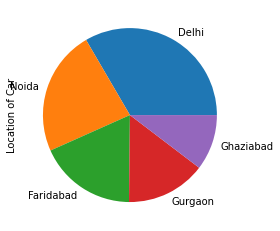

In [15]:
pd.value_counts(data["Location of Car"]).plot.pie()

<AxesSubplot:>

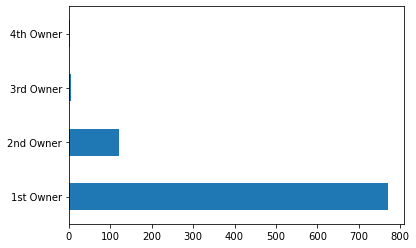

In [16]:
pd.value_counts(data["Owner"]).plot.barh()

<AxesSubplot:>

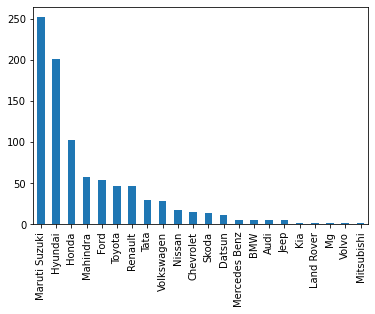

In [17]:
pd.value_counts(data["Make of Car"]).plot.bar()

<AxesSubplot:>

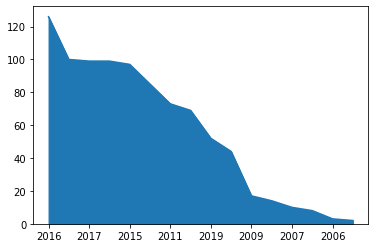

In [18]:
pd.value_counts(data["Year of Car"]).plot.area()